In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   str  
 3   Access_to_Resources         6607 non-null   str  
 4   Extracurricular_Activities  6607 non-null   str  
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   str  
 8   Internet_Access             6607 non-null   str  
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   str  
 11  Teacher_Quality             6529 non-null   str  
 12  School_Type                 6607 non-null   str  
 13  Peer_Influence              6607 non-null   str  
 14  Physical_Activity  

In [11]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='str')

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
df.shape

(6607, 20)

In [14]:
numeric_cols = df.select_dtypes(include=np.number)
numeric_cols

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


In [15]:
categorical_cols = df.select_dtypes(include='object')
categorical_cols

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


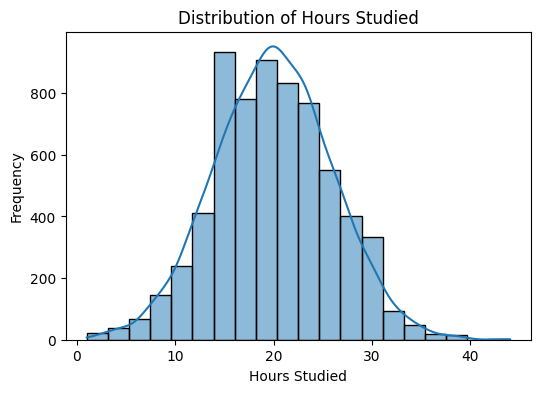

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['Hours_Studied'], bins=20, kde=True)
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Boxplot of Hours Studied')

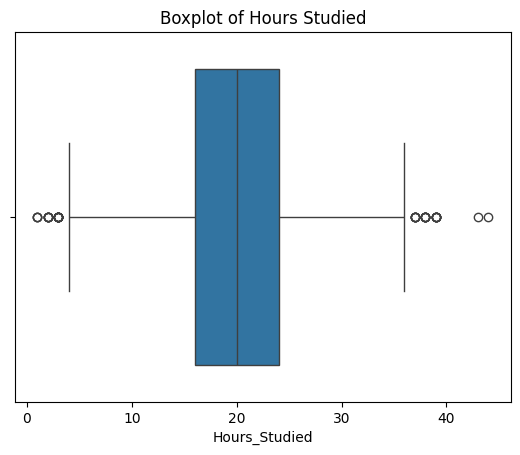

In [17]:
sns.boxplot(x=df['Hours_Studied'])
plt.title('Boxplot of Hours Studied')

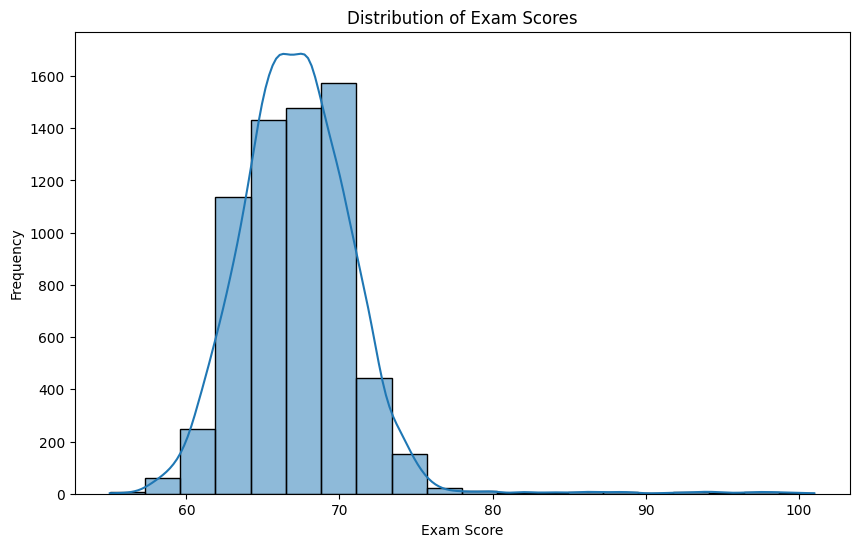

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

In [23]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='str')

Text(0, 0.5, 'Average Attendance')

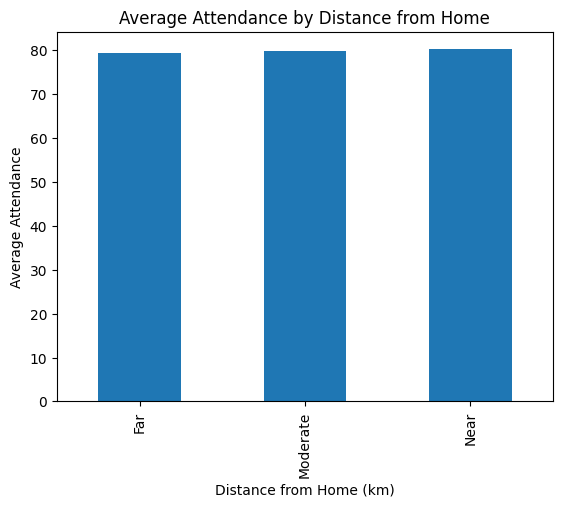

In [25]:
df.groupby('Distance_from_Home')['Attendance'].mean().plot(kind='bar')
plt.title('Average Attendance by Distance from Home')
plt.xlabel('Distance from Home (km)')
plt.ylabel('Average Attendance')

Text(0.5, 1.0, 'School Type Distribution by Family Income')

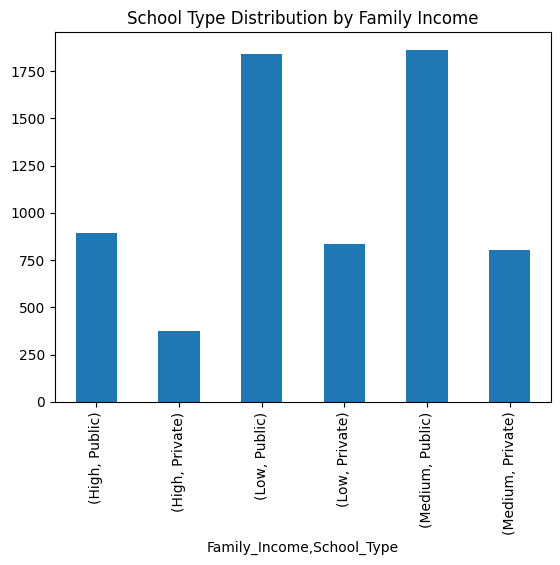

In [27]:
df.groupby('Family_Income')['School_Type'].value_counts().plot(kind='bar', stacked=True)
plt.title('School Type Distribution by Family Income')